In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,25)

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The labels in iris are sorted, which means that 
if we split the data as illustrated above, the first fold will only have the label 0 in it, 
while the last one will only have the label 2.

To avoid this problem in evaluation, we first shuffle our data:

In [3]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [4]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []
for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # store the mask for visualization
    masks.append(test_mask)
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    # fit the classifier
    classifier.fit(X_train, y_train)
    # compute the score and record it
    scores.append(classifier.score(X_test, y_test))

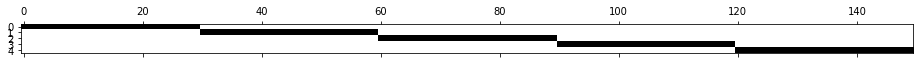

In [5]:
plt.matshow(masks, cmap='gray_r')

In [6]:
print(scores)
print(np.mean(scores))

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]
0.96


In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[1.         0.93333333 1.         1.         0.93333333]
0.9733333333333334


By default, cross_val_score will use StratifiedKFold for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0. It is generally a good idea to use StratifiedKFold whenever you do classification.

StratifiedKFold would also remove our need to shuffle iris. Let's see what kinds of folds it generates on the unshuffled iris dataset. Each cross-validation class is a generator of sets of training and test indices:



In [8]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

In [9]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [10]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

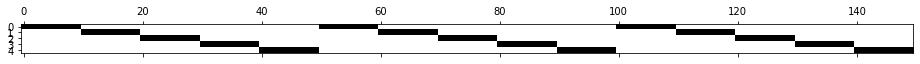

In [11]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

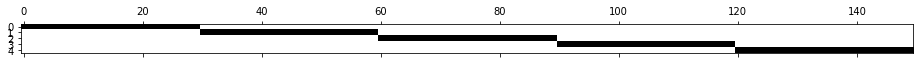

In [12]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

Keep in mind that increasing the number of folds will give you a larger training dataset, but will lead to more repetitions, and therefore a slower evaluation:

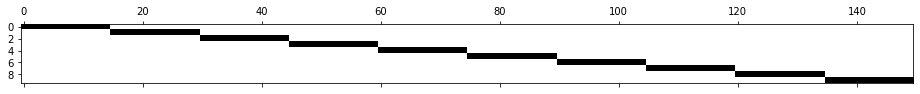

In [13]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

Another helpful cross-validation generator is ShuffleSplit. This generator simply splits of a random portion of the data repeatedly. This allows the user to specify the number of repetitions and the training set size independently:

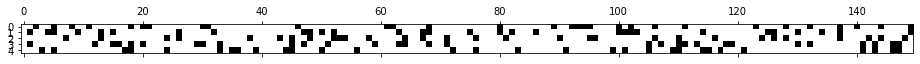

In [14]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

If you want a more robust estimate, you can just increase the number of splits:

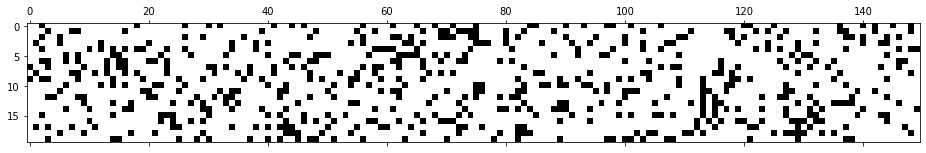

In [15]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

In [16]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667])

In [17]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 
#load the dataset and split it into training and testing sets
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [19]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

